**IMPORT STATEMENTS AND DATA EXPLORATION**

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/content/cost_revenue_dirty.csv")

In [3]:
df.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2248,1728,6/25/2004,The Notebook,"$30,000,000","$116,025,023","$81,001,787"
1673,3322,8/31/2001,Jeepers Creepers,"$10,000,000","$58,939,035","$37,904,175"
5085,765,12/25/2015,The Hateful Eight,"$62,000,000","$145,443,360","$54,117,416"
2941,450,7/20/2007,I Now Pronounce You Chuck and Larry,"$85,000,000","$185,708,462","$119,725,280"
4635,3467,7/11/2014,Elsa & Fred,"$10,000,000","$109,144","$67,657"


In [5]:
df.shape
print("No of columns = 6")
print("No of Rows = 5391")

No of columns = 6
No of Rows = 5391


In [14]:
df.isna().values.any()
print("No NAN values found in the dataset")

No NAN values found in the dataset


In [17]:
df.duplicated().values.any()
print("No duplicated cells in the dataset")

No duplicated cells in the dataset


In [18]:
df.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [24]:
df['USD_Production_Budget']= df['USD_Production_Budget'].astype(str).str.replace('$',"")
df['USD_Production_Budget']= df['USD_Production_Budget'].astype(str).str.replace(',',"")

<ipython-input-24-9f33070deafc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['USD_Production_Budget']= df['USD_Production_Budget'].astype(str).str.replace('$',"")


In [25]:
df['USD_Production_Budget'] = pd.to_numeric(df['USD_Production_Budget'])

In [26]:
df['USD_Worldwide_Gross']= df['USD_Worldwide_Gross'].astype(str).str.replace('$',"")
df['USD_Worldwide_Gross']= df['USD_Worldwide_Gross'].astype(str).str.replace(',',"")

<ipython-input-26-eec235f3903d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['USD_Worldwide_Gross']= df['USD_Worldwide_Gross'].astype(str).str.replace('$',"")


In [27]:
df['USD_Worldwide_Gross'] = pd.to_numeric(df['USD_Worldwide_Gross'])

In [28]:
df['USD_Domestic_Gross']= df['USD_Domestic_Gross'].astype(str).str.replace('$',"")
df['USD_Domestic_Gross']= df['USD_Domestic_Gross'].astype(str).str.replace(',',"")

<ipython-input-28-f74c9d69e024>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['USD_Domestic_Gross']= df['USD_Domestic_Gross'].astype(str).str.replace('$',"")


In [29]:
df['USD_Domestic_Gross'] = pd.to_numeric(df['USD_Domestic_Gross'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


In [31]:
df['Release_Date'][1]

'5/9/1916'

In [33]:
df['Release_Date']= pd.to_datetime(df['Release_Date'])

In [35]:
df['Release_Date']

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [37]:
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [41]:
print(f"Average production budget of films : {df['USD_Production_Budget'].mean()}")

Average production budget of films :31113737.57837136


In [42]:
print(f"Average Domestic Gross of films : {df['USD_Domestic_Gross'].mean()}")

Average Domestic Gross of films : 41235519.44314598


In [43]:
print(f"Average WorldWide Gross of films : {df['USD_Worldwide_Gross'].mean()}")

Average WorldWide Gross of films : 88855421.96271564


In [46]:
min_id =df['USD_Production_Budget'].idxmin()
min_film = df['Movie_Title'].loc[min_id]
min_film

'My Date With Drew'

In [47]:
df.loc[min_id]

Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                   1100
USD_Worldwide_Gross                   181041
USD_Domestic_Gross                    181041
Name: 2427, dtype: object

In [48]:
max_id = df['USD_Production_Budget'].idxmax()
max_film = df['Movie_Title'].loc[max_id]
df.loc[max_id]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object

In [52]:
zero_domestic = df[df['USD_Domestic_Gross'] == 0]
len(zero_domestic)

512

In [54]:
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [55]:
zero_ww = df[df['USD_Worldwide_Gross'] == 0]
len(zero_ww)

357

In [56]:
zero_ww.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [57]:
international_releases = df.loc[(df['USD_Domestic_Gross']==0) & (df['USD_Worldwide_Gross']!= 0)]

In [59]:
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


In [63]:
int_rls = df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
int_rls.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


In [67]:
scrap_date = pd.Timestamp('2018-5-1')

In [70]:
unreleased_films = df.loc[df['Release_Date'] >= scrap_date]
len(unreleased_films)

7

In [72]:
df_clean = df.drop(unreleased_films.index)

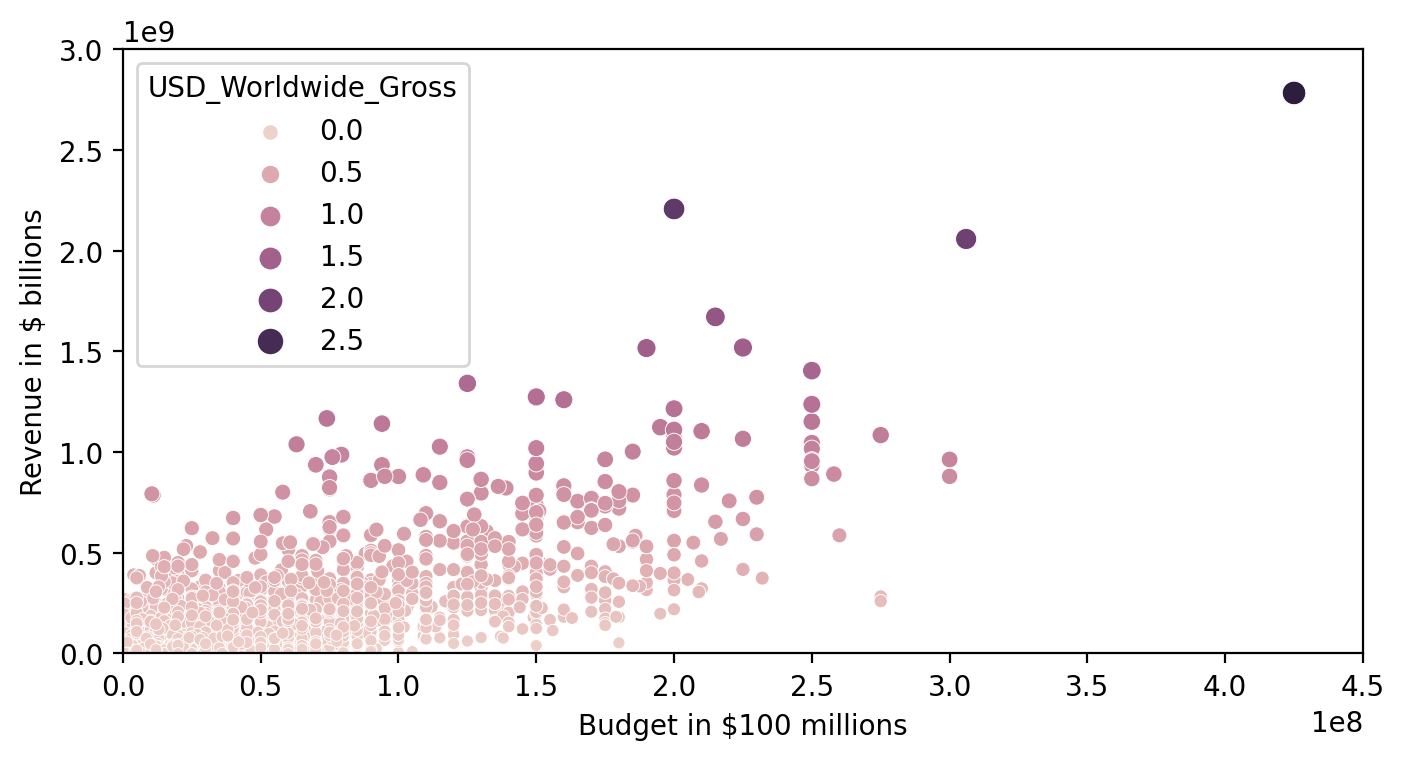

In [84]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=df_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                      hue='USD_Worldwide_Gross', 
                     size='USD_Worldwide_Gross',
                     )
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

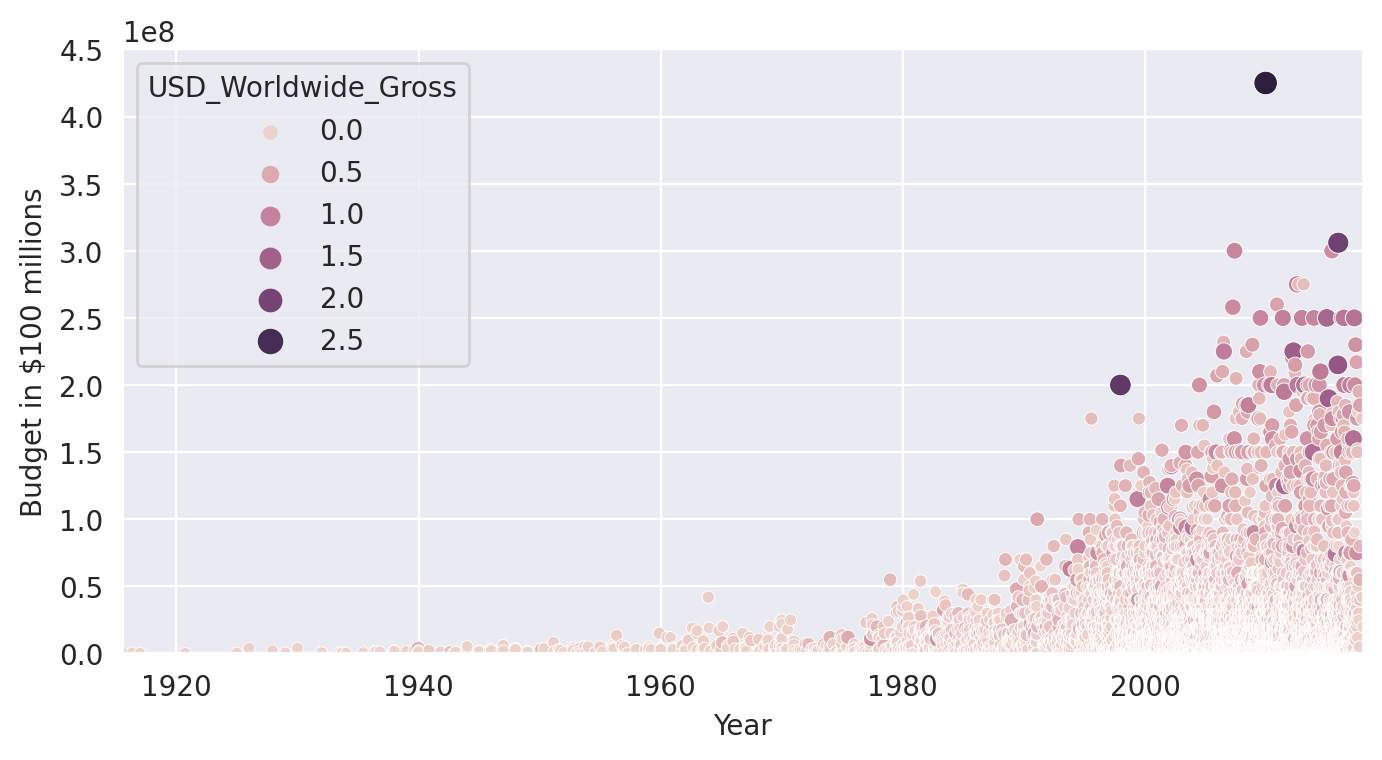

In [88]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=df_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(df_clean.Release_Date.min(), df_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')


In [96]:
years  = pd.DatetimeIndex(df_clean['Release_Date']).year
years

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [100]:
decades = years//10*10
df_clean['Decade'] = decades

In [102]:
old_films = df_clean[df_clean['Decade'] <=1960]
new_films = df_clean[df_clean['Decade'] >1960]

In [103]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.000000,1.530000e+02,1.530000e+02,1.530000e+02,153.000000
mean,4274.771242,4.611298e+06,3.041963e+07,2.238947e+07,1949.150327
std,742.137130,5.713649e+06,5.493183e+07,3.264175e+07,12.719014
min,1253.000000,1.000000e+05,0.000000e+00,0.000000e+00,1910.000000
25%,3973.000000,1.250000e+06,5.273000e+06,5.000000e+06,1940.000000
50%,4434.000000,2.900000e+06,1.000000e+07,1.000000e+07,1950.000000
75%,4785.000000,5.000000e+06,3.320810e+07,2.835000e+07,1960.000000
max,5299.000000,4.200000e+07,3.905252e+08,1.986805e+08,1960.000000


In [104]:
new_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,5231.000000,5.231000e+03,5.231000e+03,5.231000e+03,5231.000000
mean,2651.997897,3.181144e+07,9.068350e+07,4.184192e+07,2000.187345
std,1549.334078,4.075858e+07,1.704250e+08,6.670273e+07,9.582253
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1970.000000
25%,1314.500000,5.000000e+06,3.831677e+06,1.252581e+06,2000.000000
50%,2629.000000,1.800000e+07,2.854412e+07,1.751012e+07,2000.000000
75%,3967.500000,4.000000e+07,9.877700e+07,5.330158e+07,2010.000000
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08,2010.000000


In [106]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


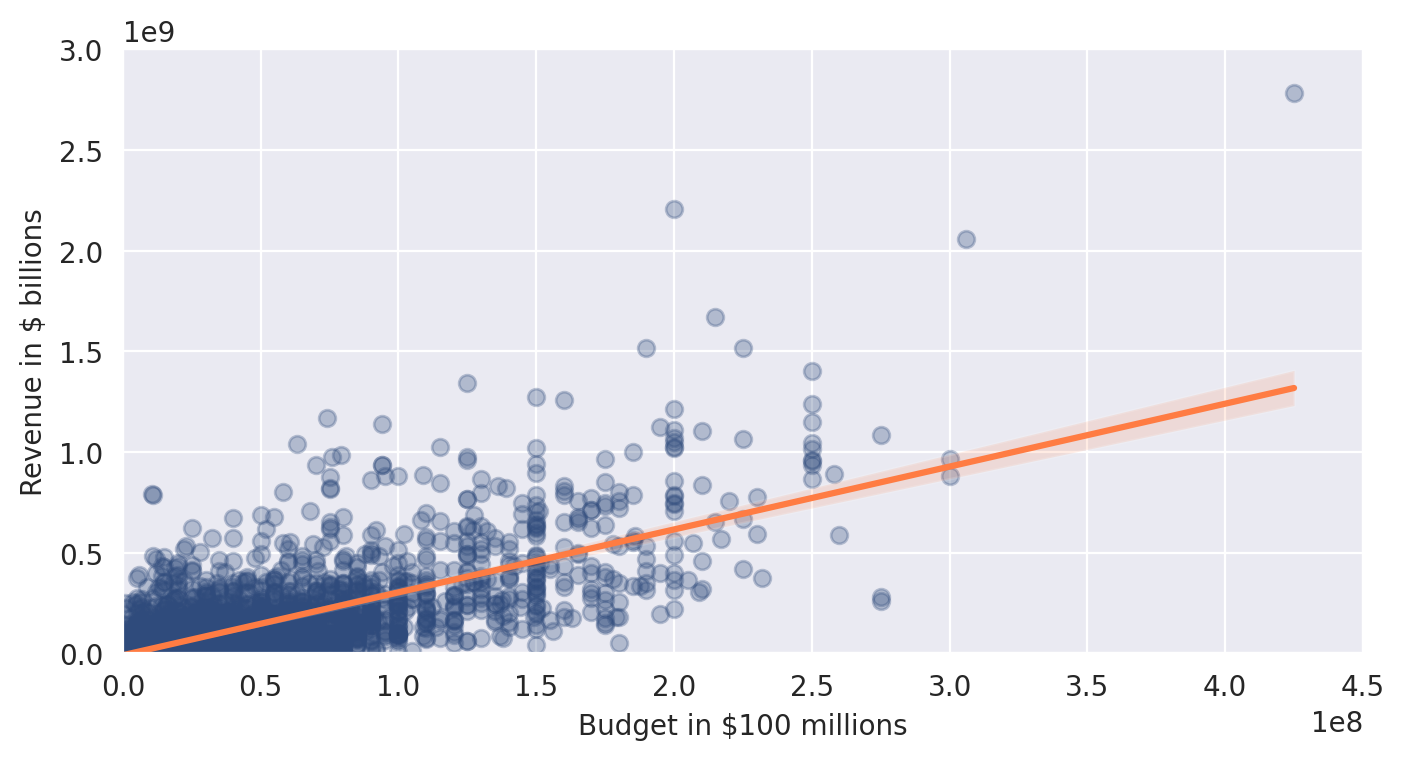

In [109]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 
  

In [112]:
regression = LinearRegression()

In [113]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

In [114]:
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

In [115]:
regression.fit(X, y)

LinearRegression()

In [116]:
regression.score(X, y)

0.5577032617720403

In [117]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $1.084e+09.
